In [1]:
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier()
from sklearn.ensemble import RandomForestClassifier
r=RandomForestClassifier()
from sklearn.tree import DecisionTreeClassifier
d=DecisionTreeClassifier()
from sklearn.linear_model import LogisticRegression
log=LogisticRegression()
from sklearn .neighbors import KNeighborsClassifier
k=KNeighborsClassifier()
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
g=GaussianNB()
b=BernoulliNB()
from xgboost import XGBClassifier
xgbc=XGBClassifier()

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
df1=pd.read_csv("train.csv")

In [4]:
df1.shape

(891, 12)

In [5]:
df2=pd.read_csv("test.csv")

In [6]:
df2.shape # test dosyasında hayatta kalanlar yok çünkü bunları tahmin edeceğiz

(418, 11)

In [7]:
df=df1.append(df2) # iki dataframe birleştirdik 

In [8]:
df.shape

(1309, 12)

In [9]:
df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [10]:
df.Embarked.value_counts() # hangi limandan kaç kişi binmiş

S    914
C    270
Q    123
Name: Embarked, dtype: int64

In [11]:
df.Embarked.value_counts(normalize=True) # limandan binenlerin yüzdesini gösterir

S    0.699311
C    0.206580
Q    0.094109
Name: Embarked, dtype: float64

In [12]:
df["Name"]

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
413                                   Spector, Mr. Woolf
414                         Oliva y Ocana, Dona. Fermina
415                         Saether, Mr. Simon Sivertsen
416                                  Ware, Mr. Frederick
417                             Peter, Master. Michael J
Name: Name, Length: 1309, dtype: object

In [13]:
df["Title"]=df["Name"].str.extract(" ([A-Za-z]+)\.",expand=False)
df["Title"].value_counts()

Mr          757
Miss        260
Mrs         197
Master       61
Dr            8
Rev           8
Col           4
Major         2
Mlle          2
Ms            2
Capt          1
Sir           1
Mme           1
Jonkheer      1
Dona          1
Lady          1
Countess      1
Don           1
Name: Title, dtype: int64

In [14]:
df["Title"]=df["Title"].replace(["Ms","Mlle"],"Miss")
df["Title"]=df["Title"].replace(["Mme","Countess","Lady","Dona"],"Mrs")
df["Title"]=df["Title"].replace(["Dr","Major","Col","Sir","Rev","Jonkheer","Capt","Don"],"Mr")

In [15]:
df["Title"].unique()

array(['Mr', 'Mrs', 'Miss', 'Master'], dtype=object)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
 12  Title        1309 non-null   object 
dtypes: float64(3), int64(4), object(6)
memory usage: 143.2+ KB


In [17]:
del df["Cabin"] # cabin verisi az olduğu için onu sildik

In [18]:
df["Fare"].fillna(df["Fare"].mean(),inplace=True) # Fare bölümünde 1 eksik veriyi ortalama veri ile doldurduk
# " fillna " boşlukları doldur demek

In [19]:
df["Age"].fillna(df["Age"].median(),inplace=True)

In [20]:
df["Family"]=df["SibSp"]+df["Parch"]+1

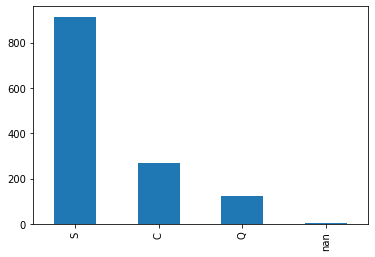

In [21]:
df.Embarked.value_counts(dropna=False).plot(kind="bar");

In [22]:
df["Embarked"]=df["Embarked"].fillna("S")

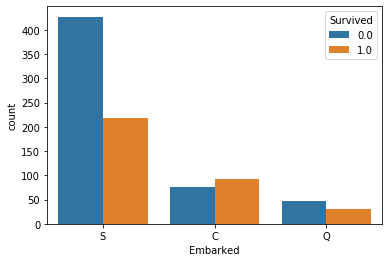

In [23]:
sns.countplot(x="Embarked",hue="Survived",data=df);

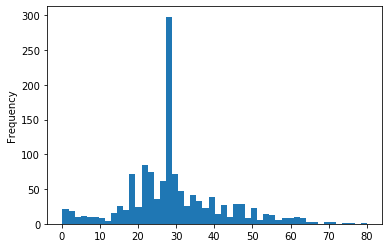

In [24]:
df.Age.plot(kind="hist",bins=50);

In [25]:
df.Family.value_counts() # bir ailenin kaç kişi olduğunu gösterir örneğin 7 kişilik 16 aile varmış

1     790
2     235
3     159
4      43
6      25
5      22
7      16
11     11
8       8
Name: Family, dtype: int64

In [26]:
df["Single"]=df.Family<2
df["Small"]=(df.Family>1)&(df.Family<5)
df["Medium"]=(df.Family>4)&(df.Family<7)
df["Large"]=(df.Family>6)

In [27]:
df.drop(["PassengerId","Ticket"],axis=1,inplace=True) # bilet numarsı vb. işimize yaramaycağını düşündük sildik

In [28]:
df_dummies=pd.get_dummies(df,drop_first=True) # string değerleri sayısal değişken olarak tutuyoruz

In [29]:
df_train=df_dummies[:891]
df_test=df_dummies[891:] # veriyi tekrar böldük bir kısmını test için ayırdık

In [30]:
df_train.shape,df_test.shape

((891, 1323), (418, 1323))

In [31]:
del df_train["Survived"]

In [32]:
y=df1["Survived"]

In [33]:
algorithms=[g,b,k,log,gbc,r,d,xgbc]
names=["GaussianNB","BernoulliNB","K Nearest","Logistic","GradientBoosting","RandomForest","Decision Tree","Xgbc"]

In [37]:
def algo_test(X,y,algorithms=algorithms,names=names):
    for i in range(len(algorithms)):
        algorithms[i]=algorithms[i].fit(X,y)
    
    accuracy=[]
    precision=[]
    recall=[]
    f1=[]
    for i in range(len(algorithms)):
        accuracy.append(accuracy_score(y,algorithms[i].predict(X)))
        precision.append(precision_score(y,algorithms[i].predict(X)))
        recall.append(recall_score(y,algorithms[i].predict(X)))
        f1.append(f1_score(y,algorithms[i].predict(X)))
    metrics=pd.DataFrame(columns=["Accuracy","Precision","Recall","F1"],index=names)
    metrics["Accuracy"]=accuracy
    metrics["Precision"]=precision
    metrics["Recall"]=recall
    metrics["F1"]=f1
    return metrics.sort_values("F1",ascending=False)    

In [38]:
algo_test(df_train,y)

D:\programlar\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
D:\programlar\anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:01:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


,Accuracy,Precision,Recall,F1
RandomForest,1.000000,1.000000,1.000000,1.000000
Decision Tree,1.000000,1.000000,1.000000,1.000000
GaussianNB,0.998878,0.997085,1.000000,0.998540
Xgbc,0.965208,0.969789,0.938596,0.953938
Logistic,0.856341,0.845161,0.766082,0.803681
GradientBoosting,0.846240,0.833876,0.748538,0.788906
BernoulliNB,0.810325,0.758209,0.742690,0.750369
K Nearest,0.812570,0.783172,0.707602,0.743472


In [36]:
df_train.isnull().sum()

Pclass        0
Age           0
SibSp         0
Parch         0
Fare          0
             ..
Embarked_Q    0
Embarked_S    0
Title_Miss    0
Title_Mr      0
Title_Mrs     0
Length: 1322, dtype: int64

In [39]:
del df_test["Survived"]

In [66]:
tahmin=k.predict(df_test)

In [58]:
tahmin

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [67]:
sonuc5=df2[["PassengerId"]]

In [68]:
sonuc5["Survived"]=tahmin

D:\programlar\anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [55]:
sonuc1.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,1
3,895,1
4,896,1


In [69]:
sonuc5.to_csv("sonuc5.csv",index=False)